### Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Importing Dataset

In [2]:
data = pd.read_csv("C:/Users/Swati Panchal/Documents/Python_Tops/Datasets/diabetes.csv")

## Exploratory Data Analysis

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.shape

(768, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
# unique values in each feature
for i in data.columns:
    print(i.ljust(25) , ' : ' ,data[i].nunique())

Pregnancies                :  17
Glucose                    :  136
BloodPressure              :  47
SkinThickness              :  51
Insulin                    :  186
BMI                        :  248
DiabetesPedigreeFunction   :  517
Age                        :  52
Outcome                    :  2


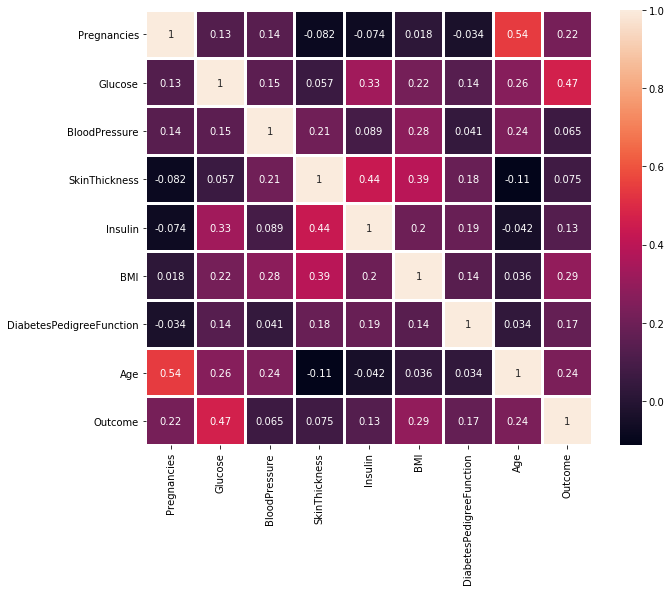

In [9]:
# correlation between each feature
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, linewidths=2)
plt.show()

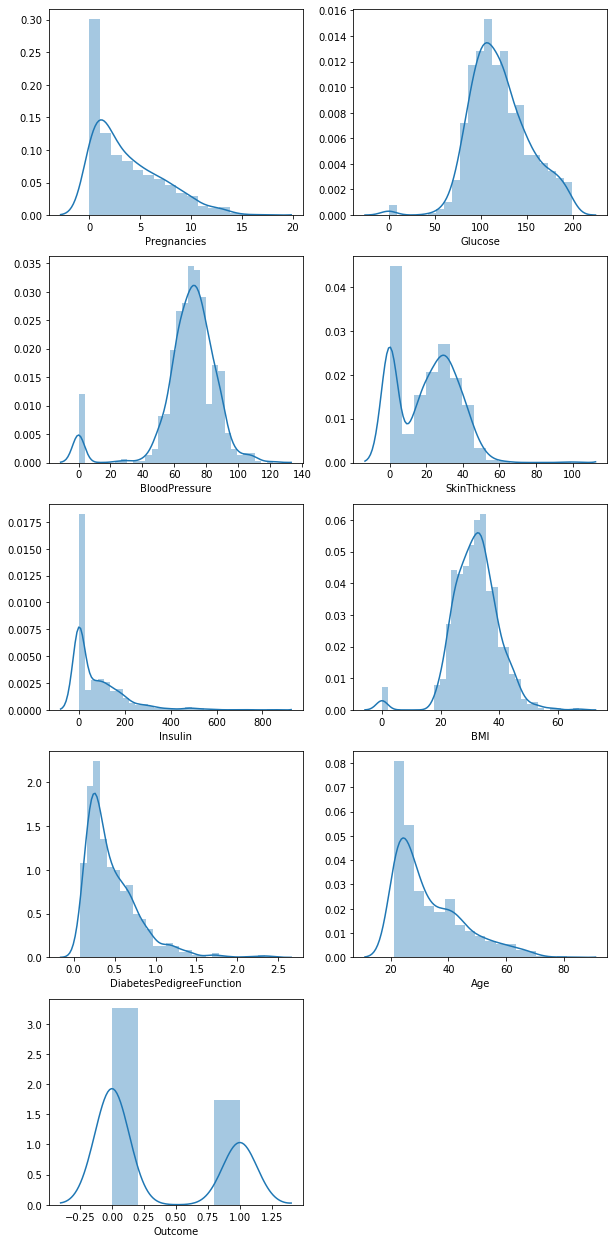

In [10]:
# visualizing the data through distribution plot
a = 5
b= 2
c = 1
plt.figure(figsize = (10,22))
for i in data.columns:
    plt.subplot(a,b,c)
    sns.distplot(data[i])
    c += 1
plt.show()

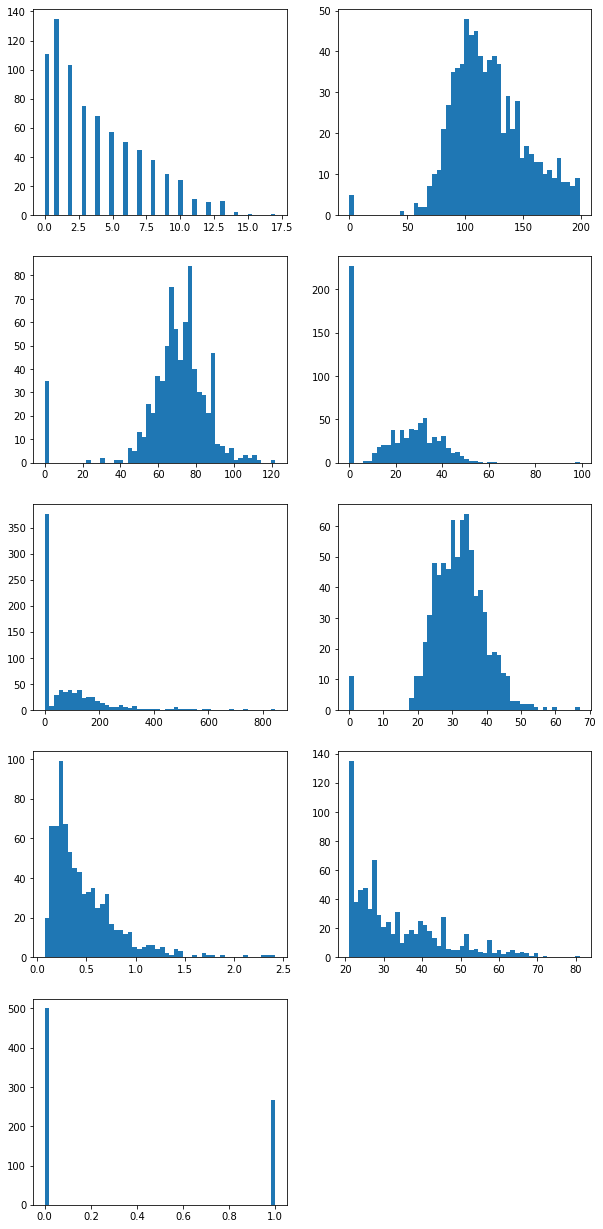

In [11]:
# visualizing the data through histplot 
a = 5
b= 2
c = 1
plt.figure(figsize = (10,22))
for i in data.columns:
    plt.subplot(a,b,c)
    plt.hist(data[i],bins=50)
    c += 1
plt.show()

#### Note : As we can see there is no null value in the dataset but actually the null values are present in dataset in form of 0. It's impossible to have Glucose, BloodPressure, SkinThickness, Insulin, BMI to be zero. 

## Replacing 0 with np.nan

In [12]:
for col in data.iloc[:,1:6]:
    data[col].replace(0,np.nan,inplace=True)
    
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1


#### Visualizing the amount of null values

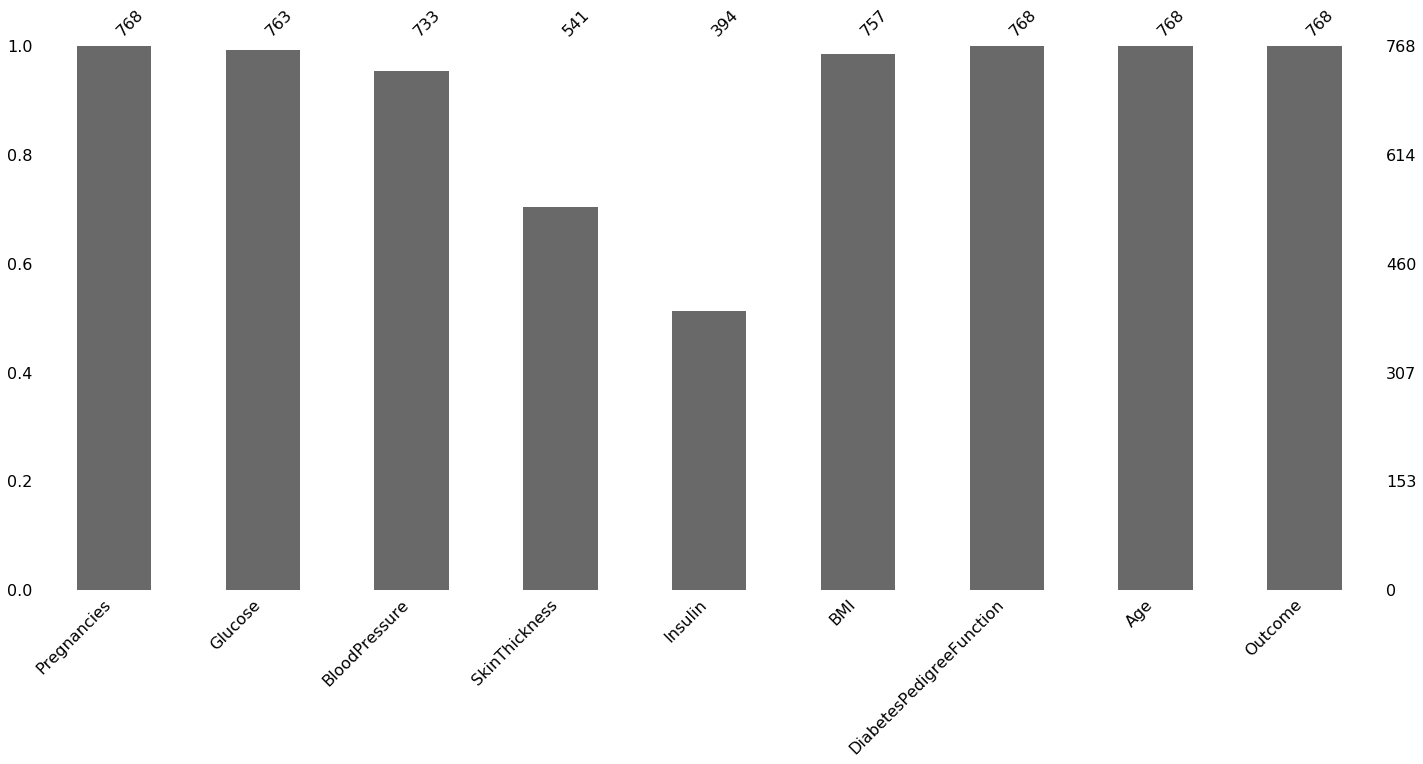

In [13]:
!pip install missingno
import missingno as msno
msno.bar(data)

In [14]:
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [15]:
data[data['Insulin'].isnull()].head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0


### Data Preprocessing

1. Separating the independent and dependent features
2. Splitting the data into train-test
3. Handling Missing Values
4. Feature Scaling
5. Feature Selection
6. Outlier Analysis

#### Separating the Independent and Dependent Feature

In [16]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [17]:
X.shape

(768, 8)

#### Train-Test Split

In [18]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size = 0.2, random_state=6004)

In [19]:
print(Xtrain.shape)
print(ytrain.shape)
print(Xtest.shape)
print(ytest.shape)

(614, 8)
(614,)
(154, 8)
(154,)


In [20]:
Xtrain

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
111,8,155.0,62.0,26.0,495.0,34.0,0.543,46
180,6,87.0,80.0,NaN,NaN,23.2,0.084,32
131,9,122.0,56.0,NaN,NaN,33.3,1.114,33
607,1,92.0,62.0,25.0,41.0,19.5,0.482,25
646,1,167.0,74.0,17.0,144.0,23.4,0.447,33
...,...,...,...,...,...,...,...,...
336,0,117.0,NaN,NaN,NaN,33.8,0.932,44
311,0,106.0,70.0,37.0,148.0,39.4,0.605,22
544,1,88.0,78.0,29.0,76.0,32.0,0.365,29
651,1,117.0,60.0,23.0,106.0,33.8,0.466,27


#### Total Null values in data

In [21]:
data.isnull().sum().sort_values(ascending=False)

Insulin                     374
SkinThickness               227
BloodPressure                35
BMI                          11
Glucose                       5
Pregnancies                   0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

#### Replacing the null values of below columns with mean as it has less amount of null values

In [22]:
for col in ['BloodPressure','BMI','Glucose']:
    mean_val = Xtrain[col].mean()
    Xtrain[col] = Xtrain[col].fillna(mean_val)
    Xtest[col] = Xtest[col].fillna(mean_val)

#### Replacing the null values of below columns with random sample imputation as it has large amount of null values

In [23]:
for col in ['Insulin','SkinThickness']:
    train_sample = Xtrain[col].dropna().sample(Xtrain[col].isnull().sum(),random_state = 6004)
    # pandas need to have same index on order to merge the dataset
    train_sample.index = Xtrain[Xtrain[col].isnull()].index
    
    test_sample = Xtrain[col].dropna().sample(Xtest[col].isnull().sum(),random_state = 6004)
    test_sample.index = Xtest[Xtest[col].isnull()].index
    
    Xtrain.loc[Xtrain[col].isnull(),col] = train_sample
    Xtest.loc[Xtest[col].isnull(),col] = test_sample

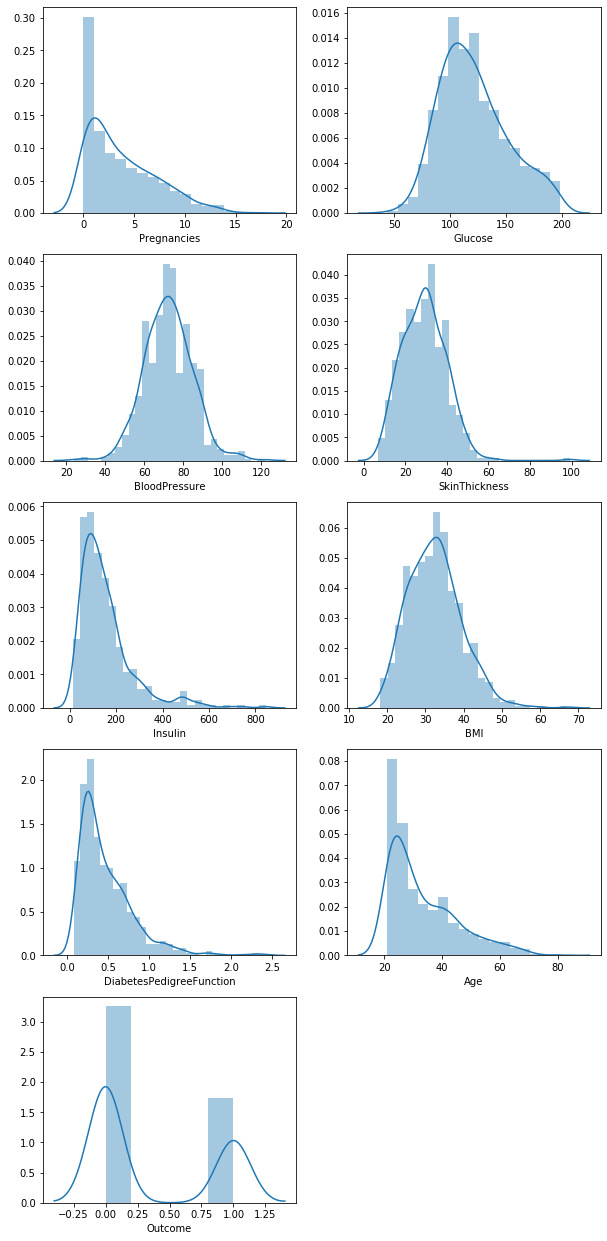

In [24]:
# data after imputation
a = 5
b= 2
c = 1
plt.figure(figsize = (10,22))
for i in data.columns:
    plt.subplot(a,b,c)
    sns.distplot(data[i])
    c += 1
plt.show()

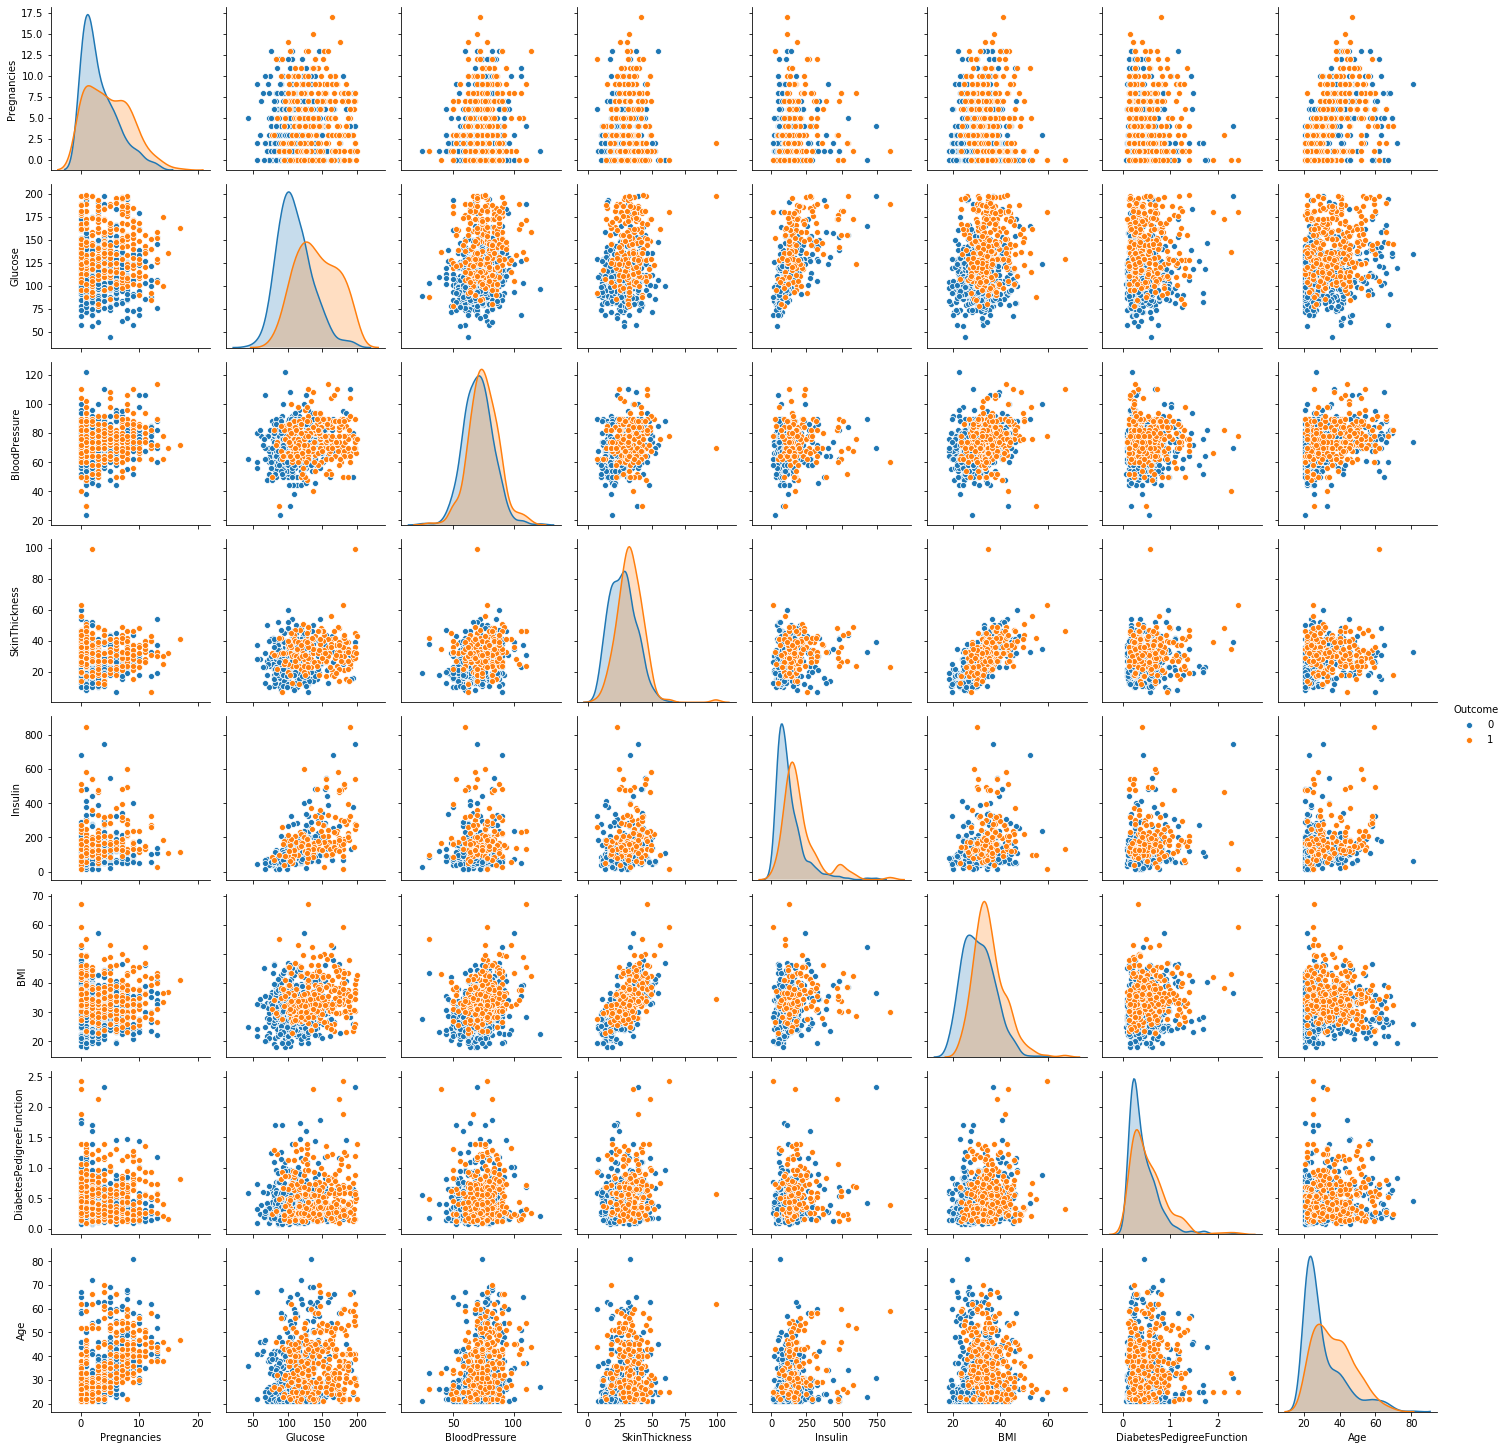

In [25]:
sns.pairplot(data, hue="Outcome")

#### Feature Scaling

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Xtrain = pd.DataFrame(scaler.fit_transform(Xtrain), columns = Xtrain.columns)
Xtest = pd.DataFrame(scaler.transform(Xtest), columns = Xtest.columns)

In [27]:
Xtrain.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1.186646,1.108248,-0.911206,-0.317661,3.039489,0.243771,0.261317,1.023487
1,0.603766,-1.174392,0.649972,-1.378204,-0.688590,-1.376866,-1.228498,-0.140102
2,1.478087,0.000496,-1.431599,0.164405,0.254551,0.138730,2.114660,-0.056988
3,-0.853436,-1.006551,-0.911206,-0.414074,-1.000005,-1.932084,0.063325,-0.721896
4,-0.853436,1.511067,0.129579,-1.185378,-0.083556,-1.346854,-0.050278,-0.056988


In [28]:
Xtest.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.561996,-1.006551,-1.778527,-1.378204,-0.688590,-0.341459,-1.043488,-0.971237
1,1.186646,-0.738005,0.303044,0.164405,0.254551,0.949049,-0.884444,0.691033
2,-0.561996,0.201906,0.476508,0.742883,0.254551,1.639320,2.471696,-0.223215
3,-0.853436,-0.972983,-0.217349,0.164405,0.993049,-0.296441,-0.478721,-0.888123
4,0.312325,0.269042,0.823436,-0.799726,-0.893234,1.009072,1.601826,0.275466


In [29]:
Xtrain.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02
mean,-4.194980e-17,2.574849e-16,1.541474e-16,1.472763e-16,-1.022526e-16,-6.933017e-16,4.592779e-17,1.370601e-16
std,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00
min,-1.144876e+00,-2.215008e+00,-4.207027e+00,-2.149508e+00,-1.222444e+00,-2.127161e+00,-1.228498e+00,-1.054350e+00
25%,-8.534361e-01,-7.380053e-01,-7.160589e-01,-7.033127e-01,-6.885902e-01,-7.428665e-01,-7.059263e-01,-8.050098e-01
50%,-2.705554e-01,-1.002086e-01,0.000000e+00,1.978509e-02,-2.526096e-01,3.198700e-15,-3.148093e-01,-3.894422e-01
75%,6.037657e-01,6.299007e-01,6.499720e-01,6.464699e-01,3.435271e-01,6.189188e-01,4.763505e-01,6.079198e-01
max,3.809609e+00,2.585251e+00,3.598864e+00,6.720492e+00,6.162533e+00,3.740146e+00,5.435097e+00,3.932460e+00


#### Feature Selection

In [30]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

ordered_rank_features = SelectKBest(k=8)
ordered_feature = ordered_rank_features.fit(Xtrain,ytrain)

In [31]:
ordered_feature.scores_
dfscores = pd.DataFrame(ordered_feature.scores_, columns=['Scores'])
dfcolumns = pd.DataFrame(Xtrain.columns)
dfscores.sort_values(by = 'Scores',ascending=False)

,Scores
1,192.938293
5,67.910678
0,36.231042
7,26.974301
3,24.891029
2,19.979741
6,15.764027
4,12.066419


#### Outlier Analysis

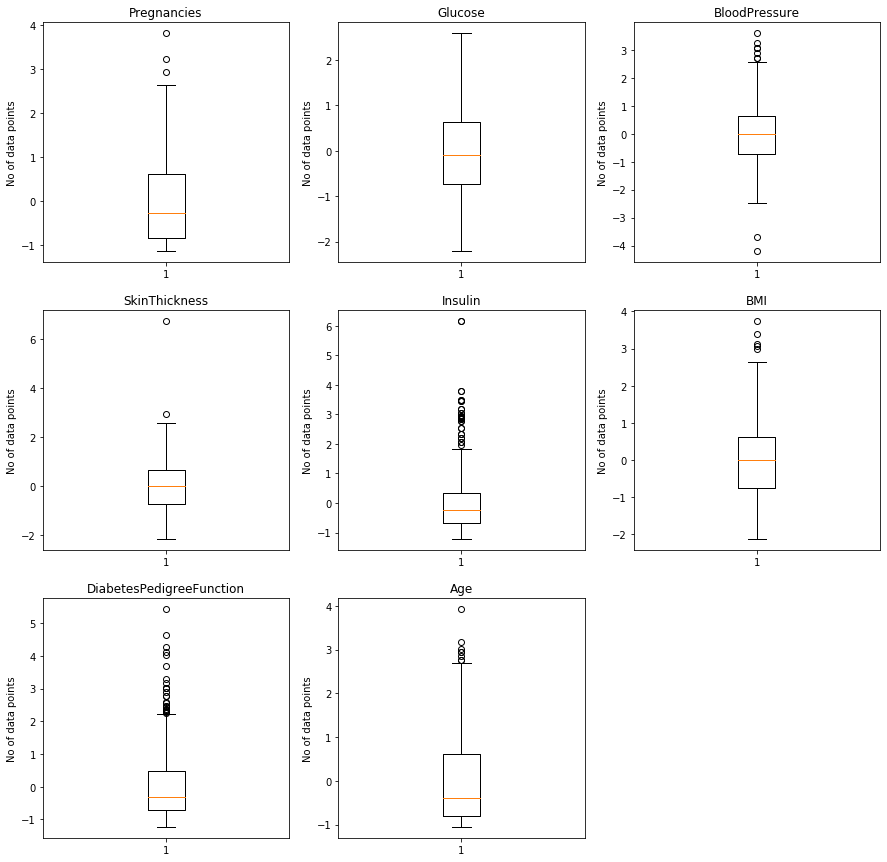

In [32]:
# Train data

fig = plt.figure(figsize=(15,15))
a = 3
b = 3
c = 1
for i in Xtrain.columns:
    plt.subplot(a, b, c)
    plt.boxplot(Xtrain[i])
    plt.title(i)
    plt.ylabel("No of data points")
    c += 1

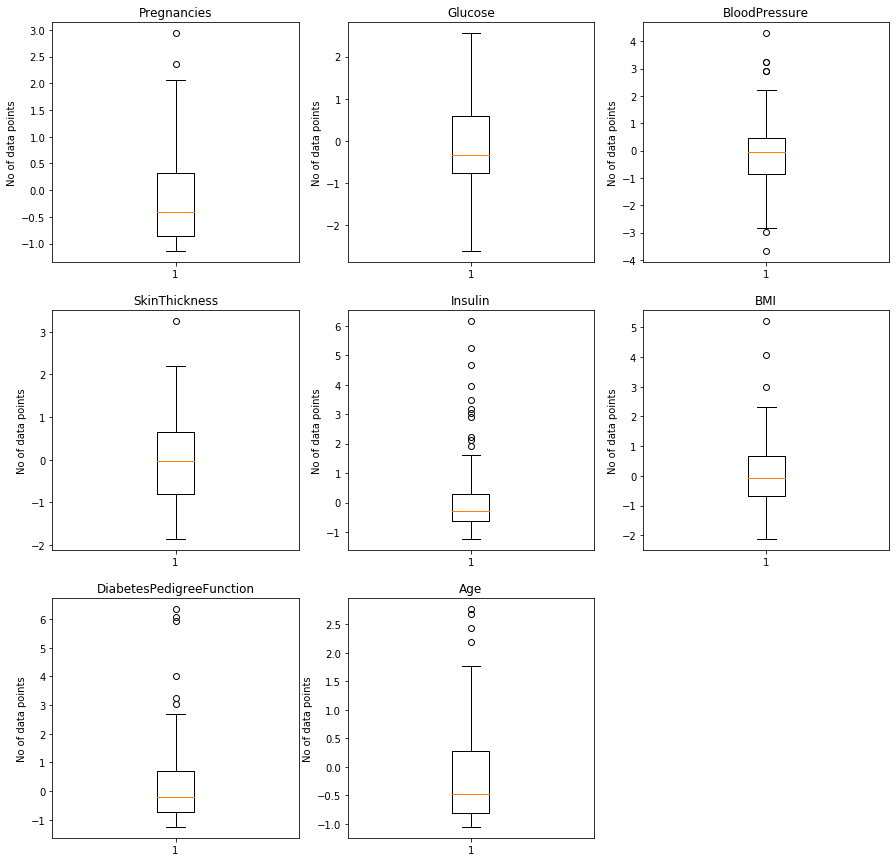

In [33]:
# Test data

fig = plt.figure(figsize=(15,15))
a = 3
b = 3
c = 1
for i in Xtest.columns:
    plt.subplot(a, b, c)
    plt.boxplot(Xtest[i])
    plt.title(i)
    plt.ylabel("No of data points")
    c += 1

#### Handling Outliers

In [34]:
# Lets calculate the interquantile range to calculate the boundaries

for i in Xtrain.columns:
    
    upper_bound = Xtrain[i].mean() + 3*Xtrain[i].std()
    lower_bound = Xtrain[i].mean() - 3*Xtrain[i].std()
    print(upper_bound,lower_bound)
    
    
    Xtrain.loc[Xtrain[i]<=lower_bound,i] = lower_bound
    Xtrain.loc[Xtrain[i]>=upper_bound,i] = upper_bound
    
    Xtest.loc[Xtest[i]<=lower_bound,i] = lower_bound
    Xtest.loc[Xtest[i]>=upper_bound,i] = upper_bound

3.0024459849151035 -3.0024459849151035
3.0024459849150986 -3.0024459849150977
3.0024459849150986 -3.0024459849150986
3.0024459849151004 -3.0024459849151004
3.0024459849150977 -3.0024459849150977
3.002445984915096 -3.0024459849150977
3.0024459849150995 -3.0024459849150995
3.0024459849150955 -3.0024459849150955


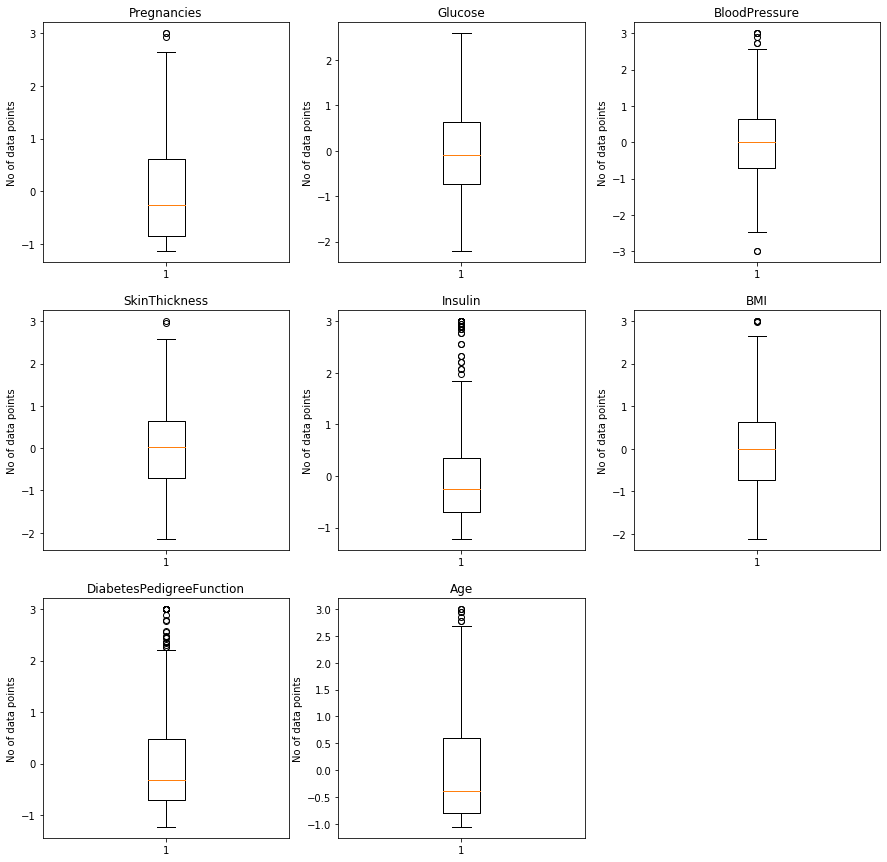

In [35]:
# data after handling outliers

fig = plt.figure(figsize=(15,15))
a = 3
b = 3
c = 1
for i in Xtrain.columns:
    plt.subplot(a, b, c)
    plt.boxplot(Xtrain[i])
    plt.title(i)
    plt.ylabel("No of data points")
    c += 1

#### Logistic Regression

In [123]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold 

param_grid = {'C': [0.001,0.01,0.1,1,10,100],  
              'penalty':['none', 'l1', 'l2', 'elasticnet'],
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              'class_weight' : [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100}]}

cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=1294)
# define grid search
grid = GridSearchCV(LogisticRegression(), param_grid=param_grid, n_jobs=-1, cv=cv, scoring='accuracy')
# execute the grid search
grid_result = grid.fit(Xtrain, ytrain)
# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

grid_pred = grid_result.predict(Xtest)

print(confusion_matrix(ytest,grid_pred))
print(classification_report(ytest,grid_pred))

Best: 0.762084 using {'C': 0.01, 'class_weight': {0: 1, 1: 1}, 'penalty': 'l2', 'solver': 'liblinear'}
[[85 15]
 [18 36]]
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       100
           1       0.71      0.67      0.69        54

    accuracy                           0.79       154
   macro avg       0.77      0.76      0.76       154
weighted avg       0.78      0.79      0.78       154



In [124]:
from sklearn.model_selection import StratifiedKFold 
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

kf = StratifiedKFold(n_splits=10,shuffle=True,random_state=1294)
pred_test_full =0
cv_score =[]
i=1
for train_index,test_index in kf.split(Xtrain,ytrain):
    print('{} of KFold {}'.format(i,kf.n_splits))
    xtr,xvl = Xtrain.iloc[train_index],Xtrain.iloc[test_index]
    ytr,yvl = ytrain.iloc[train_index],ytrain.iloc[test_index]
    
    #model
    lr = LogisticRegression(C = 0.1, penalty = 'l2', solver = 'liblinear')
    lr.fit(xtr,ytr)
    score = roc_auc_score(yvl,lr.predict(xvl))
    print('ROC AUC score:',score)
    cv_score.append(score)    
    pred_test = lr.predict_proba(Xtest)[:,1]
    pred_test_full +=pred_test
    i+=1

1 of KFold 10
ROC AUC score: 0.7579545454545455
2 of KFold 10
ROC AUC score: 0.7034090909090909
3 of KFold 10
ROC AUC score: 0.7602272727272728
4 of KFold 10
ROC AUC score: 0.7704545454545454
5 of KFold 10
ROC AUC score: 0.7470238095238095
6 of KFold 10
ROC AUC score: 0.569047619047619
7 of KFold 10
ROC AUC score: 0.6732142857142858
8 of KFold 10
ROC AUC score: 0.7357142857142858
9 of KFold 10
ROC AUC score: 0.7357142857142858
10 of KFold 10
ROC AUC score: 0.6970238095238095


In [127]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import mean_squared_error

pred = lr.predict(Xtest)
print(confusion_matrix(ytest,pred))
print(classification_report(ytest,pred))

train_pred = lr.predict(Xtrain)
test_pred = lr.predict(Xtest)

print("Training accuracy : ",accuracy_score(ytrain,train_pred))
print("Testing accuracy : ",accuracy_score(ytest,test_pred))
print()
print(mean_squared_error(ytrain,model.predict(Xtrain))**(0.5))
print(mean_squared_error(ytest,model.predict(Xtest))**(0.5))

[[88 12]
 [17 37]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       100
           1       0.76      0.69      0.72        54

    accuracy                           0.81       154
   macro avg       0.80      0.78      0.79       154
weighted avg       0.81      0.81      0.81       154

Training accuracy :  0.7801302931596091
Testing accuracy :  0.8116883116883117

0.48428058736275703
0.43394894666502914


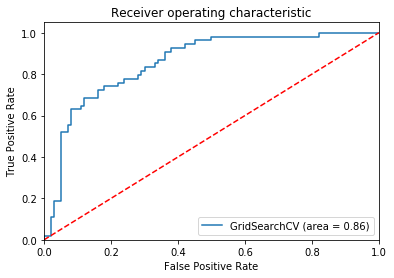

In [128]:
from sklearn import metrics

probs = lr.predict_proba(Xtest)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(ytest, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='GridSearchCV (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()